In [155]:
import tkinter as tk
from tkinter import filedialog

try:
    root = tk.Tk()
    root.withdraw()  # Hide the main window

    file_path = filedialog.askopenfilename(title="Select a file", filetypes=[("Text files", "*.txt"), ("All files", "*")])

    root.deiconify()  # Make the main window visible again
    if not file_path:  # Check if the user cancelled the dialog
        print("No file selected.")
    else:
        print("Selected file:", file_path)

except Exception as e:
    print("An error occurred:", e)

finally:
    root.destroy()  # Close the main window when done

Selected file: M:/personal_learning/WhatsApp Chat - Gobi family/gobi_family_whatsapp.txt


In [156]:
messages = []
with open(file_path, 'r', encoding='utf-8') as chat:
    for line in chat:
        messages.append(line)

messages

['[7/5/15, 10:04:26\u202fAM] Gobi family: \u200eMessages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.\n',
 '[7/5/15, 10:04:26\u202fAM] Gobi family: \u200eGroup creator created this group\n',
 '[7/5/15, 10:04:26\u202fAM] Gobi family: \u200eYou were added\n',
 '\u200e[7/27/22, 8:37:12\u202fPM] Nitya Akka: \u200eimage omitted\n',
 "[7/27/22, 8:37:51\u202fPM] Nitya Akka: Breakfast @ my friend vandana's house👌\n",
 '[7/27/22, 8:38:29\u202fPM] Nitya Akka: I have never tasted this kind of soft idlies😋😋\n',
 '[7/27/22, 8:39:05\u202fPM] Nitya Akka: Missing paati very much😞\n',
 '[7/27/22, 9:06:38\u202fPM] Amma: 😋\n',
 '[7/27/22, 10:27:39\u202fPM] ~\u202fVMK: Enna bajji? Vazhakai? Or Kathrikkai?\n',
 '[7/27/22, 10:29:20\u202fPM] Nitya Akka: No bajji..only different kind of vada\n',
 '[7/27/22, 10:29:32\u202fPM] Nitya Akka: Aha....😄\n',
 '[7/27/22, 11:24:59\u202fPM] Radha Chithi: Prathapa inga anupittu enjoy..... 😜\n',
 '[7/27/22,

In [157]:
# importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from nltk.probability import FreqDist
import datetime
import emoji
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [158]:
# reading the chat to a dataframe

data_frame = pd.read_table(file_path, names=['messages'], header = None)

data_frame = data_frame.iloc[3:]
data_frame.head()

,messages
3,"‎[7/27/22, 8:37:12 PM] Nitya Akka: ‎image omitted"
4,"[7/27/22, 8:37:51 PM] Nitya Akka: Breakfast @ ..."
5,"[7/27/22, 8:38:29 PM] Nitya Akka: I have never..."
6,"[7/27/22, 8:39:05 PM] Nitya Akka: Missing paat..."
7,"[7/27/22, 9:06:38 PM] Amma: 😋"


In [159]:
# parsing the data_frame into date time, sender and message
data_frame[['DateTime', 'rest']] = data_frame['messages'].str.split("]",expand=True, n=1)
data_frame[['person', 'message']] = data_frame.rest.str.split(":",expand=True, n=1)
data_frame.drop(columns=['messages', 'rest'], axis= 1, inplace=True)

date_time = data_frame['DateTime'].to_list()
print(type(date_time))
print(date_time)

# replace '[ with '' in the date_time list
for i in range(len(date_time)):
    date_time[i] = date_time[i].replace('[', '')


#print(date_time)

# store this in data_frame

data_frame['DateTime'] = date_time

data_frame.head()

<class 'list'>
['\u200e[7/27/22, 8:37:12\u202fPM', '[7/27/22, 8:37:51\u202fPM', '[7/27/22, 8:38:29\u202fPM', '[7/27/22, 8:39:05\u202fPM', '[7/27/22, 9:06:38\u202fPM', '[7/27/22, 10:27:39\u202fPM', '[7/27/22, 10:29:20\u202fPM', '[7/27/22, 10:29:32\u202fPM', '[7/27/22, 11:24:59\u202fPM', '[7/27/22, 11:49:46\u202fPM', '[7/28/22, 12:46:13\u202fAM', '[7/28/22, 1:10:14\u202fAM', '\u200e[7/28/22, 7:49:19\u202fAM', '[7/29/22, 6:42:02\u202fAM', '[7/29/22, 7:10:49\u202fAM', '[7/29/22, 7:12:02\u202fAM', '\u200e[7/31/22, 3:52:52\u202fAM', '[7/31/22, 3:54:03\u202fAM', '[7/31/22, 3:54:15\u202fAM', '[7/31/22, 4:21:12\u202fAM', '\u200e[7/31/22, 12:02:39\u202fPM', '[8/2/22, 10:29:54\u202fPM', '[8/2/22, 10:29:59\u202fPM', '[8/2/22, 10:31:50\u202fPM', '[8/2/22, 10:33:24\u202fPM', '[8/2/22, 10:39:50\u202fPM', '\u200e[8/3/22, 5:02:37\u202fAM', '[8/3/22, 5:34:33\u202fAM', '[8/3/22, 5:40:29\u202fAM', '[8/3/22, 6:17:33\u202fAM', '[8/3/22, 6:34:56\u202fAM', '[8/3/22, 6:47:08\u202fAM', '\u200e[8/3/22, 10:18:43\

,DateTime,person,message
3,"‎7/27/22, 8:37:12 PM",Nitya Akka,‎image omitted
4,"7/27/22, 8:37:51 PM",Nitya Akka,Breakfast @ my friend vandana's house👌
5,"7/27/22, 8:38:29 PM",Nitya Akka,I have never tasted this kind of soft idlies😋😋
6,"7/27/22, 8:39:05 PM",Nitya Akka,Missing paati very much😞
7,"7/27/22, 9:06:38 PM",Amma,😋


In [160]:
# get rid of all the "image omitted"
data = data_frame[~data_frame["message"].str.contains("omitted", na=False)]

# sort of the date into a proper date column
data['DateTime'] = data['DateTime'].map(lambda x: x.replace(',',''))
data['DateTime'] = data['DateTime'].map(lambda x: x.strip('['))
data['DateTime'] = pd.to_datetime(data['DateTime'], format='%m/%d/%y %I:%M:%S %p', errors='coerce')

# remove null rows 
print('Number of rows before dropping null: {}'.format(data.shape[0]))
data = data[data['DateTime'].notnull()]
print('Number of rows after dropping null: {}'.format(data.shape[0]))
data.head()

Number of rows before dropping null: 4036
Number of rows after dropping null: 2489


C:\Users\mohan\AppData\Local\Temp\ipykernel_39040\1277663306.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DateTime'] = data['DateTime'].map(lambda x: x.replace(',',''))
C:\Users\mohan\AppData\Local\Temp\ipykernel_39040\1277663306.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DateTime'] = data['DateTime'].map(lambda x: x.strip('['))
C:\Users\mohan\AppData\Local\Temp\ipykernel_39040\1277663306.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

,DateTime,person,message
4,2022-07-27 20:37:51,Nitya Akka,Breakfast @ my friend vandana's house👌
5,2022-07-27 20:38:29,Nitya Akka,I have never tasted this kind of soft idlies😋😋
6,2022-07-27 20:39:05,Nitya Akka,Missing paati very much😞
7,2022-07-27 21:06:38,Amma,😋
8,2022-07-27 22:27:39,~ VMK,Enna bajji? Vazhakai? Or Kathrikkai?


In [161]:
# save the data_frame to a csv file
data.to_csv('muskeeters_chat.csv')

In [171]:
# create 4 new columns Date time:

data['weekday'] = data['DateTime'].apply(lambda x: x.day_name())

data['month'] = data['DateTime'].apply(lambda x: x.month_name())

data['year'] = data['DateTime'].apply(lambda x: x.year)

data['time'] = data['DateTime'].apply(lambda x: x.time())

data.head()


,DateTime,person,message,weekday,month,year,time
4,2022-07-27 20:37:51,Nitya Akka,Breakfast @ my friend vandana's house👌,Wednesday,July,2022,20:37:51
5,2022-07-27 20:38:29,Nitya Akka,I have never tasted this kind of soft idlies😋😋,Wednesday,July,2022,20:38:29
6,2022-07-27 20:39:05,Nitya Akka,Missing paati very much😞,Wednesday,July,2022,20:39:05
7,2022-07-27 21:06:38,Amma,😋,Wednesday,July,2022,21:06:38
8,2022-07-27 22:27:39,~ VMK,Enna bajji? Vazhakai? Or Kathrikkai?,Wednesday,July,2022,22:27:39


In [163]:

def plot_bar_graph_for_messages_in_day_of_the_week(data_frame, column, title):
    plt.figure(figsize=(10,5))
    sns.countplot(x=column, hue='person', data=data_frame)
    plt.title(title)
    plt.xlabel('Day of the week')
    plt.ylabel('Number of messages')
    plt.show()


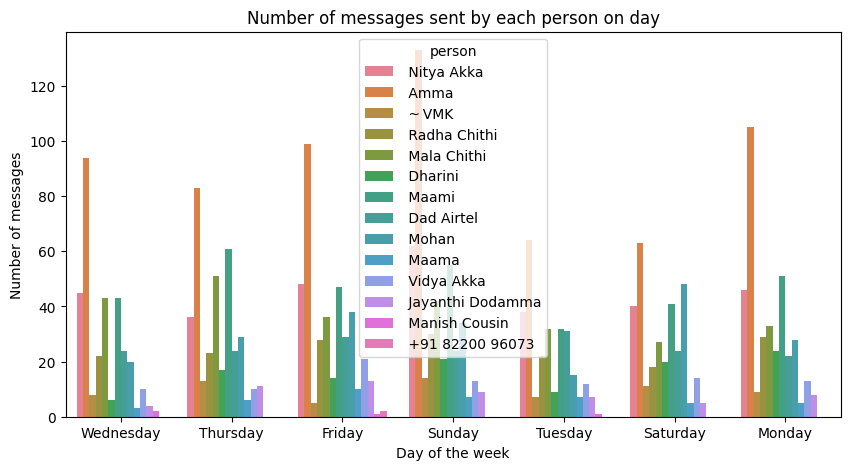

In [164]:
plot_bar_graph_for_messages_in_day_of_the_week(data, 'weekday', 'Number of messages sent by each person on day')

In [165]:
# plot some other interesting graphs using the same data_frame

def plot_bar_graph_for_messages_in_month_or_year(data_frame, column, title):
    plt.figure(figsize=(10,5))
    sns.countplot(x=column, hue='person', data=data_frame)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Number of messages')
    plt.show()

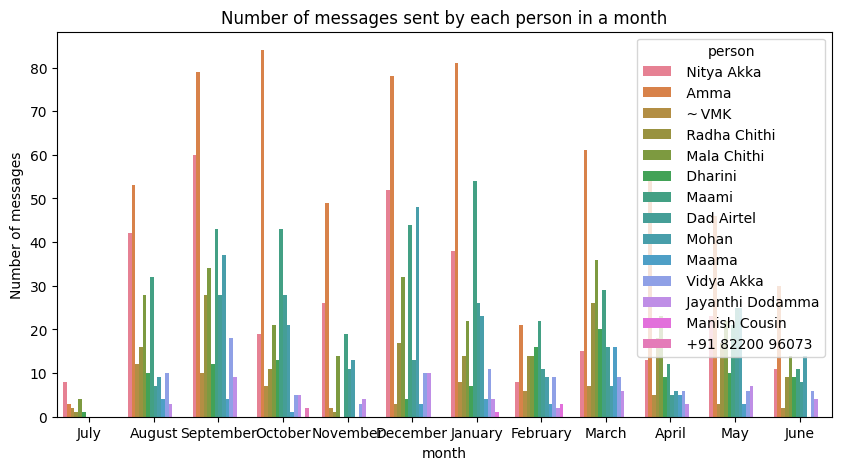

In [166]:
plot_bar_graph_for_messages_in_month_or_year(data, 'month', 'Number of messages sent by each person in a month')

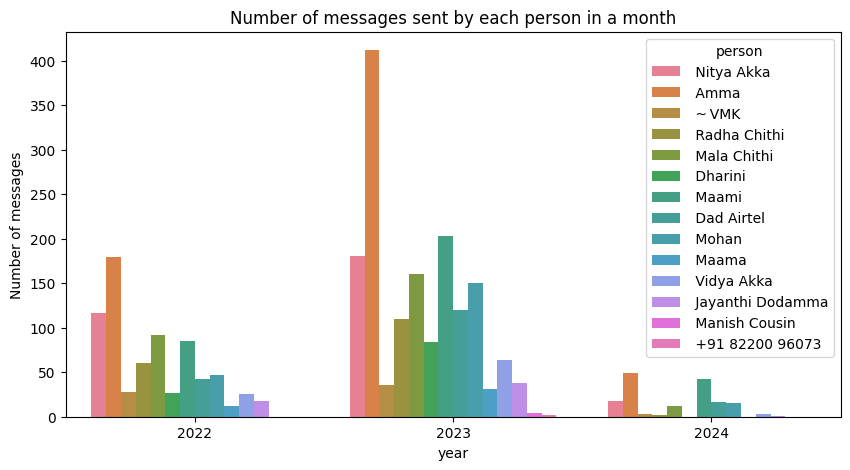

In [167]:
plot_bar_graph_for_messages_in_month_or_year(data, 'year', 'Number of messages sent by each person in a month')

In [169]:
# draw a pie chart to show the number of messages sent by each person in a year

def draw_pie_chart_in_year(data_frame, column, title):
    plt.figure(figsize=(10,5))
    grouped_data = data_frame.groupby('year')[column].value_counts()
    #data_frame[column].value_counts().plot.pie(autopct='%1.1f%%')
    grouped_data.unstack().plot(kind='pie', subplots=True, layout=(2, -1), autopct='%1.1f%%', figsize=(12, 6))
    plt.title(title)
    plt.show()

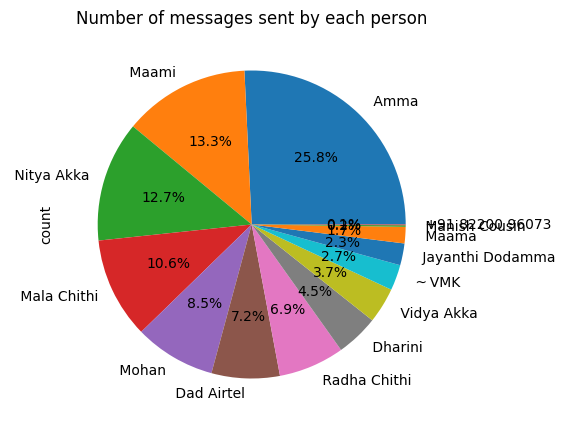

In [170]:
draw_pie_chart(data, 'person', 'Number of messages sent by each person')